# Exploratory Data Analysis

### Roles to Explore:

In [3]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
df = pd.read_csv('data_jobs.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


### Filter for Italian Data Analyst Roles

In [4]:
df_DA_IT = df[(df['job_country'] == 'Italy') & (df['job_title_short'] == 'Data Analyst')]

In [5]:
df_DA_IT 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
46,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,NaN,NaN,NaN,Agoda,"[sas, sas, r, python, vba, sql, java, sql serv...","{'analyst_tools': ['sas', 'spss', 'tableau', '..."
321,Data Analyst,Data Analyst Informatica PowerCenter,"Rome, Metropolitan City of Rome, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-01-21 13:37:45,True,False,Italy,NaN,NaN,NaN,Beta 80 spa,NaN,NaN
330,Data Analyst,Junior Digital Marketing Analyst,"Bologna, Metropolitan City of Bologna, Italy",via BeBee,Full-time,False,Italy,2023-07-26 13:43:55,True,False,Italy,NaN,NaN,NaN,Randstad Italia Spa,"[html, gdpr, excel]","{'analyst_tools': ['excel'], 'libraries': ['gd..."
837,Data Analyst,Junior Data Consultant - Data Analyst,"Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Contractor,False,Italy,2023-09-01 13:54:14,False,False,Italy,NaN,NaN,NaN,World Food Programme,"[c, python, r, sql, matplotlib, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
1306,Data Analyst,"Data Analyst, Trilogy (Remote) - $100,000/year...",Anywhere,via LinkedIn,Full-time and Contractor,True,Italy,2023-11-06 14:10:56,False,False,Italy,NaN,NaN,NaN,Crossover,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784623,Data Analyst,Operation Data Analyst,Italy,via Lavoro Trabajo.org,Full-time,False,Italy,2023-04-13 06:35:00,False,False,Italy,NaN,NaN,NaN,STMicroelectronics,NaN,NaN
784995,Data Analyst,Categoria Protetta FULL REMOTE – DATA ANALYST,"Bologna, Metropolitan City of Bologna, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-01-27 06:31:46,False,False,Italy,NaN,NaN,NaN,Lavoropiù SpA Divisione Politiche Attive,"[java, javascript, sql, python, scala, spark, ...","{'libraries': ['spark', 'react'], 'other': ['d..."
785104,Data Analyst,Data Analyst,"Milan, Metropolitan City of Milan, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-05-29 06:46:11,False,False,Italy,NaN,NaN,NaN,SKINLABO SRL,"[python, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785215,Data Analyst,Internship Data Quality,"Bologna, Metropolitan City of Bologna, Italy",via Lavoro Trabajo.org,Full-time,False,Italy,2023-05-29 06:46:00,False,False,Italy,NaN,NaN,NaN,CRIF S.p.A.,"[scala, sql]","{'programming': ['scala', 'sql']}"


### Job Location Analysis

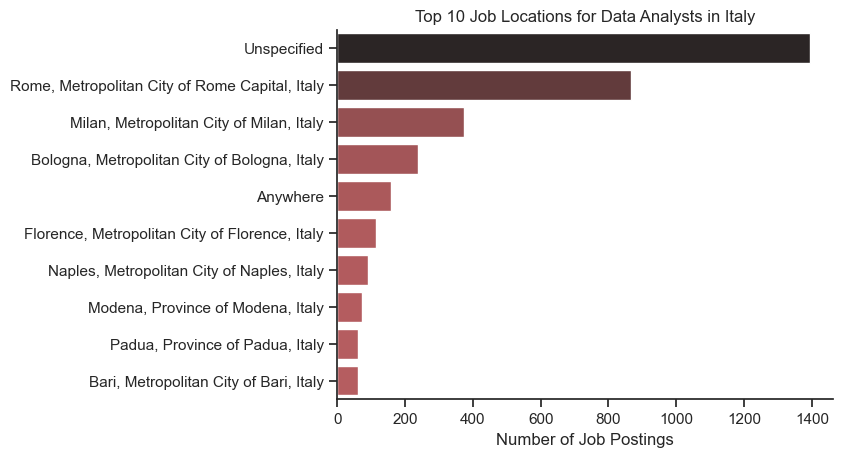

In [16]:
df_plot = df_DA_IT['job_location'].replace('Italy', 'Unspecified').value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:r_r', legend=False)
sns.despine()
plt.title('Top 10 Job Locations for Data Analysts in Italy')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()

### Benefits and Requirements

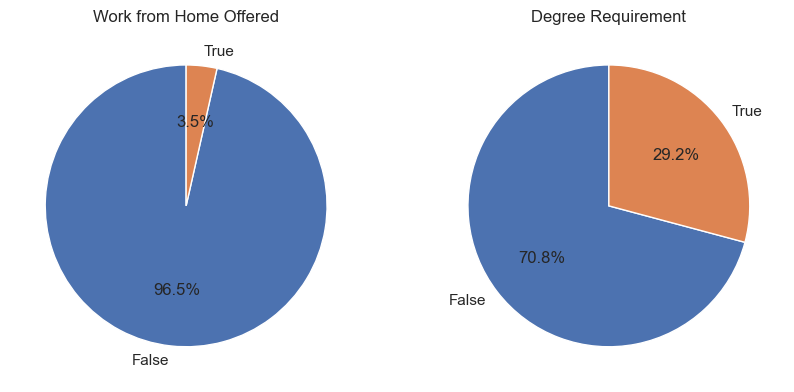

In [21]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((10, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_IT[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

### Companies

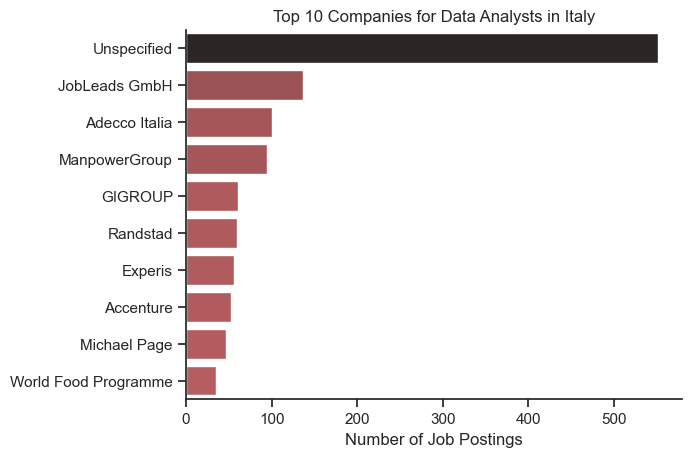

In [23]:
df_plot = df_DA_IT['company_name'].replace('Confidenziale', 'Unspecified').value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:r_r', legend=False)
sns.despine()
plt.title('Top 10 Companies for Data Analysts in Italy')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()